## Visualize the confusion matrices

Labels: ['sedentary_sitting_other', 'sedentary_sitting_transport', 'upright_standing', 'upright_stepping_low', 'upright_stepping_moderate']
Column 'precision' - Mean: 0.58, Std: 0.11
Column 'recall' - Mean: 0.64, Std: 0.08
Column 'f1' - Mean: 0.58, Std: 0.10
Column 'kappa' - Mean: 0.53, Std: 0.11
Column 'f1_weighted' - Mean: 0.73, Std: 0.08
Row 1 Confusion Matrix:
[[173   3  12   2   0]
 [ 24 283  19   7   0]
 [ 49   9  97 105   3]
 [  1   2  22  92   1]
 [  0   0   0   3   2]]



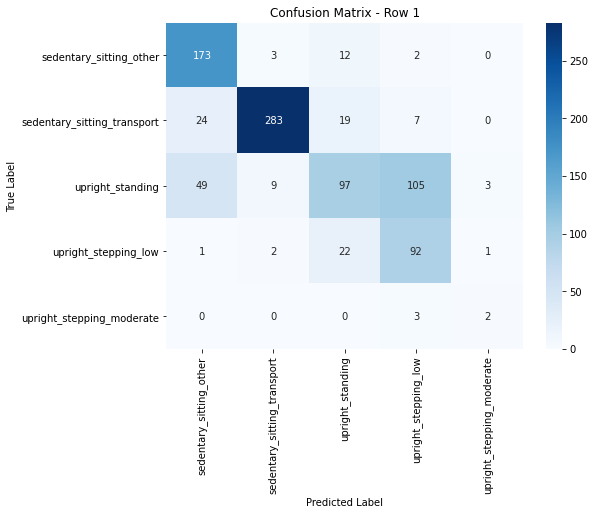

Row 2 Confusion Matrix:
[[753   3  48   7   1]
 [  2   5   2   0   0]
 [  8   2  59  62   6]
 [  1   1  11  45  11]
 [  0   0   0   0   0]]



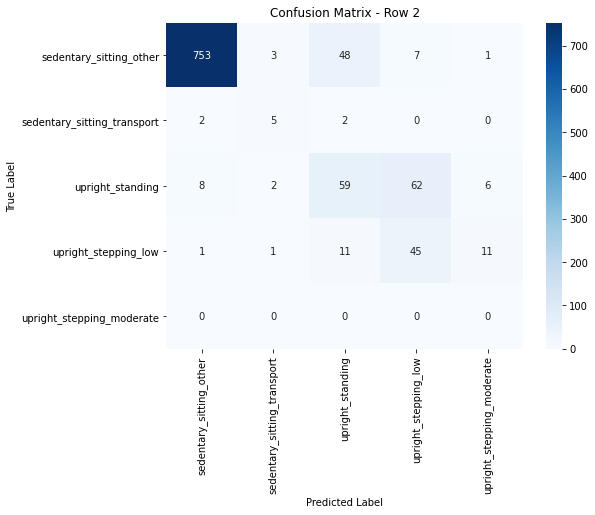

Row 3 Confusion Matrix:
[[249  21 142   7   0]
 [  2  64   7   2   0]
 [ 77  20 310 182   2]
 [  1  19  28 135   6]
 [  0   0   0   0   0]]



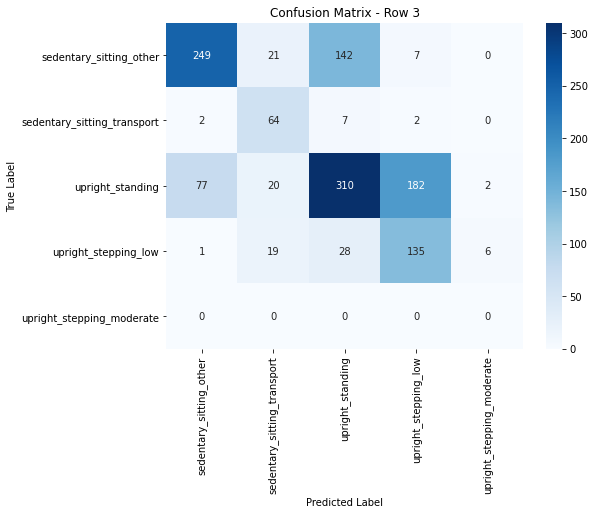

Row 4 Confusion Matrix:
[[786  34 264 113   1]
 [  0  18   0   6   0]
 [ 49   5  72 112   2]
 [  1   1   2  25   2]
 [  0   0   0   0   0]]



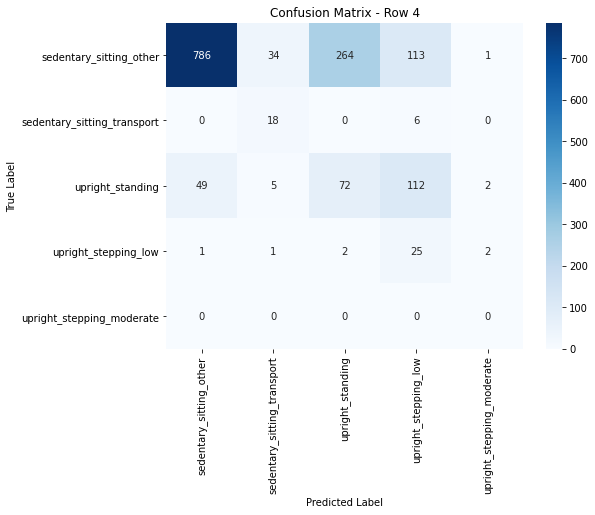

Row 5 Confusion Matrix:
[[798  72 115   7   0]
 [  6  16   0   1   0]
 [ 53  21 155  44   1]
 [  0   4  16  25   7]
 [  0   0   0   1 128]]



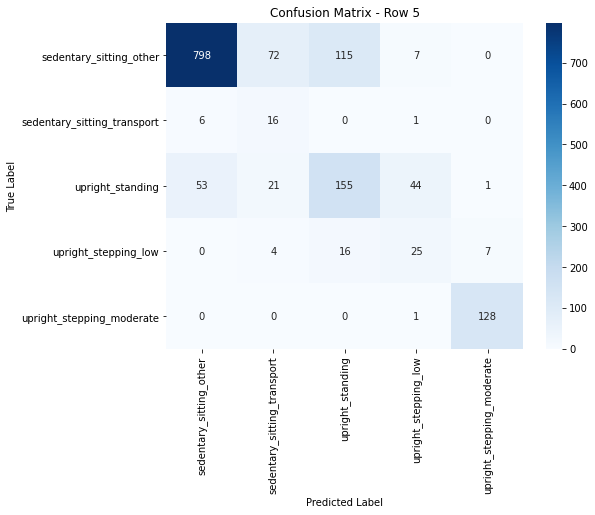

Row 6 Confusion Matrix:
[[413  18 138  12   0]
 [  2  44   3   2   0]
 [119  30 273 105   3]
 [  0   0  10  11  10]
 [  0   0   0   1  33]]



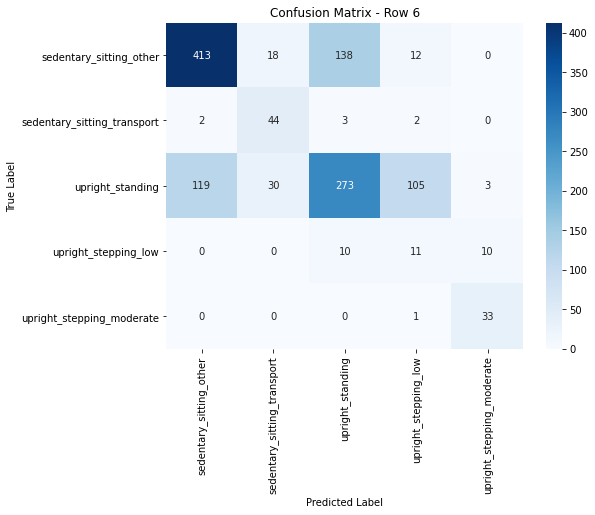

Row 7 Confusion Matrix:
[[521  11  73  12   0]
 [ 10  67   5   1   0]
 [ 28  33 222  67   0]
 [  2  19  67 118   7]
 [  0   0   2  20   6]]



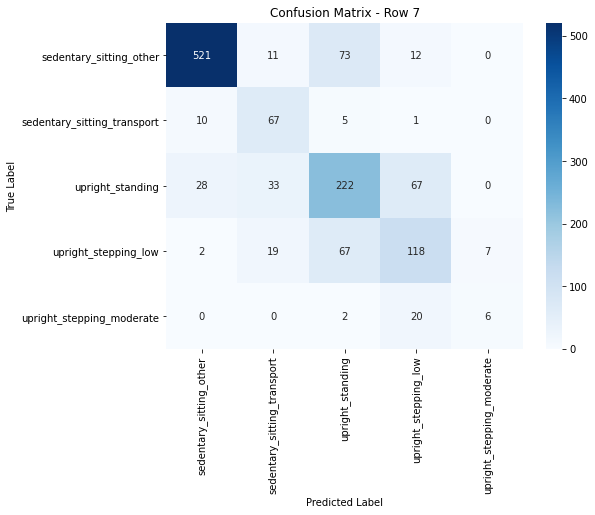

Row 8 Confusion Matrix:
[[408  21  65   0   0]
 [  0   0   0   0   0]
 [  6  10  55   5   1]
 [  0   1   3  13   0]
 [  1   0   0   2  41]]



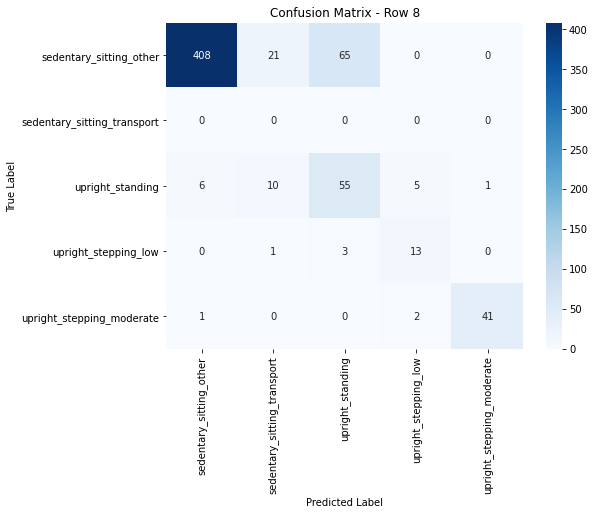

Row 9 Confusion Matrix:
[[343  11 173   0   0]
 [ 17  78  17   2   0]
 [ 86  16 331  46   3]
 [  1   0  16  27   6]
 [  0   0   1   1  86]]



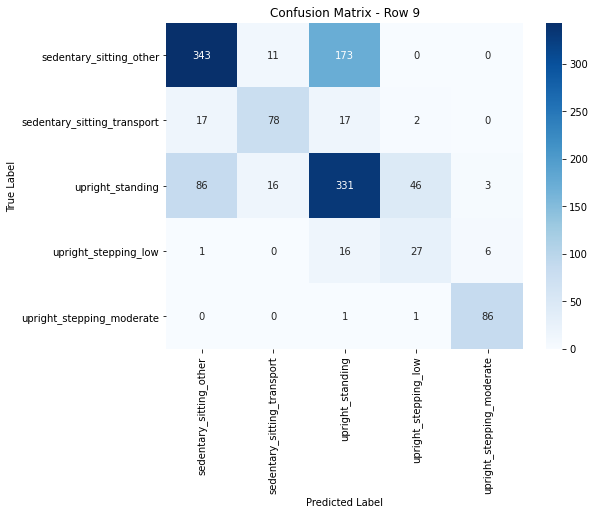

Row 10 Confusion Matrix:
[[1113    4  270   46    1]
 [  24  125   35   52    0]
 [ 184    6  931  276    0]
 [   3    5   83  112    5]
 [   0    0    3   19  107]]



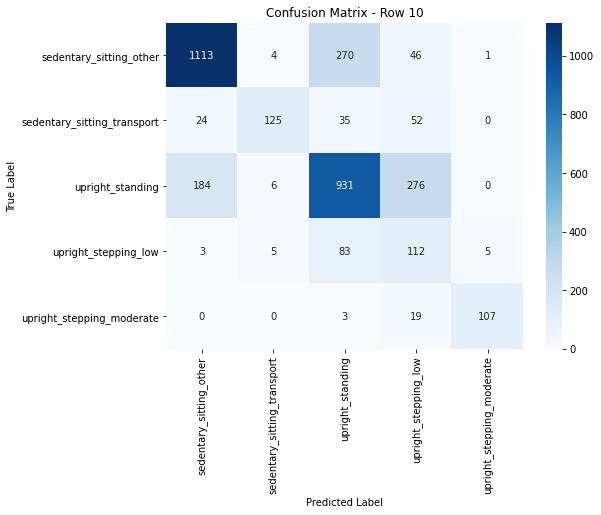

Row 11 Confusion Matrix:
[[929   9 253  10   3]
 [  5  55   3   2   0]
 [ 26   2 114  44   6]
 [  0   0   3  17   1]
 [  0   0   0   8 130]]



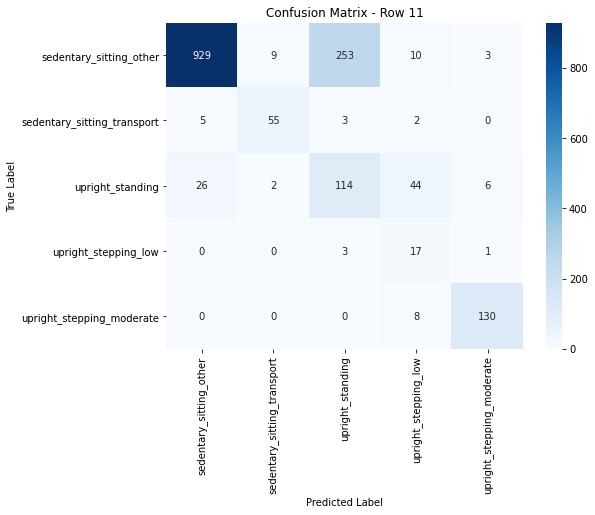

Row 12 Confusion Matrix:
[[348  22  17   6   2]
 [ 11 103   9   0   0]
 [ 45  23 122  23   0]
 [  0   2  16  32   3]
 [  0   0   4  65  44]]



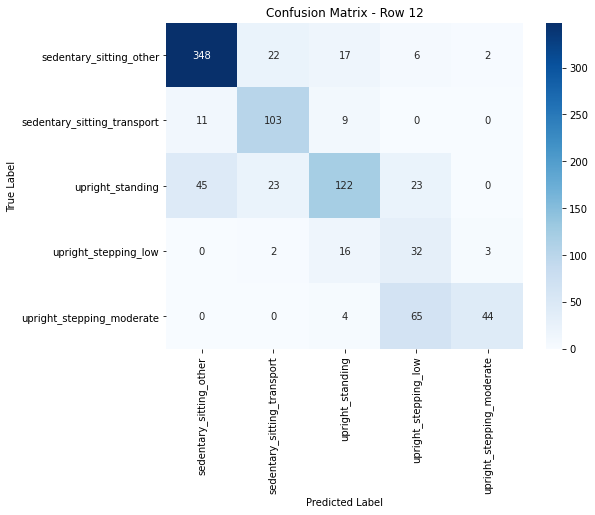

Row 13 Confusion Matrix:
[[744  29 263   7   1]
 [ 75 450  45  20   0]
 [ 46   9 114  30   1]
 [  3   2  32  54  10]
 [  0   0   0  10   8]]



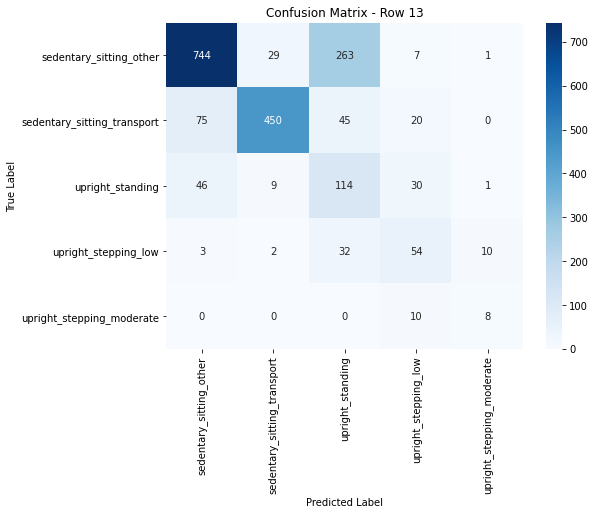

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast  # To safely parse confusion matrix from CSV (if stored as a string)

def visualize_confusion_matrices(folder_path):
    # 1️⃣ Load label mapping
    label_mapping_path = os.path.join(folder_path, "label_mapping.json")
    if not os.path.exists(label_mapping_path):
        raise FileNotFoundError(f"label_mapping.json not found in {folder_path}")

    with open(label_mapping_path, "r") as f:
        label_mapping = json.load(f)
    
    labels = list(label_mapping.keys())
    print(f"Labels: {labels}")
    # 2️⃣ Find CSV file with the longest name
    csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the folder.")

    scores_csv = max(csv_files, key=len)
    csv_path = os.path.join(folder_path, scores_csv)
    
    
    # 3️⃣ Read CSV and extract confusion matrices
    df = pd.read_csv(csv_path)
    if "confusion_matrix" not in df.columns:
        raise KeyError("CSV file does not contain 'confusion_matrix' column.")
    # 4️⃣ Calculate the mean and std for other columns
    other_columns = df.columns[df.columns != "confusion_matrix"]  # Exclude 'confusion_matrix'
    for column in other_columns:
        mean_value = df[column].mean()
        std_value = df[column].std()
        print(f"Column '{column}' - Mean: {mean_value:.2f}, Std: {std_value:.2f}")
    
    for i, row in df.iterrows():
        try:
            raw_conf_matrix = row["confusion_matrix"]
            # print(f"Row {i+1} Confusion Matrix (raw):\n{raw_conf_matrix}\n")  # Debugging print
            # Clean up the string and convert to list of lists
            cleaned = raw_conf_matrix.replace('[', '').replace(']', '')
            rows = [list(map(int, row.split())) for row in cleaned.split()]

            # Convert to numpy array
            conf_matrix = np.array(rows).reshape(len(labels), len(labels))
            # Clean and format the confusion matrix string
            # conf_matrix_str = raw_conf_matrix.replace("\n", " ")  # Remove newlines
            # conf_matrix_str = " ".join(conf_matrix_str.split())  # Remove extra spaces
            print(f"Row {i+1} Confusion Matrix:\n{conf_matrix}\n")  # Debugging print
            # conf_matrix = ast.literal_eval(conf_matrix_str)  # Convert string to list
            # conf_matrix = np.array(conf_matrix)

            # 4️⃣ Plot confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                        xticklabels=labels, yticklabels=labels)

            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.title(f"Confusion Matrix - Row {i+1}")
            plt.show()
        
        except Exception as e:
            print(f"Skipping row {i+1} due to error: {e}")

# Usage Example
folder_path = "/home/hossein/ssl-wearables/data/reports/2025-02-13_14-23"
visualize_confusion_matrices(folder_path)